In [1]:
# Importing necessary libraries
from astropy.table import Table
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.utils import resample
import seaborn as sns
import joblib


In [2]:
# Reading the data
dft = Table.read('/home/samanehjavadinia/Co-op/Data/ngvs_matched.fits')


In [3]:
dft.columns

<TableColumns names=('ngvsID','x_sex','y_sex','ra_in','dec_in','elongation','umag','gmag','rmag','imag','zmag','ksmag','uerr','gerr','rerr','ierr','zerr','kserr','iC','iCerr','ebv','flags','field','background_g','ug0','gi0','iz0','ik0','p_star','p_gc','p_galx','main_id','ra_cds','dec_cds','coo_err_maj','coo_err_min','coo_err_angle','nbref','ra_sexa','dec_sexa','coo_qual','coo_bibcode','main_type','other_types','radvel','radvel_err','redshift','redshift_err','sp_type','morph_type','plx','plx_err','pmra','pmdec','pm_err_maj','pm_err_min','pm_err_pa','size_maj','size_min','size_angle','B','V','R_cds','J','H','K','u','g','r_cdsa','i','z','angDist')>

In [4]:
dft = dft[['ngvsID','x_sex','y_sex','ra_in','dec_in','elongation','umag','gmag','rmag','imag','zmag','ksmag','uerr'
           ,'gerr','rerr','ierr','zerr','kserr','iC','iCerr','ebv',  
           'field','background_g','ug0','gi0','iz0','ik0','p_star','p_gc','p_galx',
'main_type','other_types']].to_pandas()


In [5]:
# Apply the transformations to all columns
dft = dft.applymap(lambda x: x.decode('UTF-8').strip().upper() if isinstance(x, bytes) else x)

In [6]:
dft = dft.drop(columns=['ngvsID','field','x_sex','y_sex','ra_in','dec_in', 'other_types'])

In [7]:
dft.head()

,elongation,umag,gmag,rmag,imag,zmag,ksmag,uerr,gerr,rerr,...,ebv,background_g,ug0,gi0,iz0,ik0,p_star,p_gc,p_galx,main_type
0,0.0,35.000000,24.950600,99.0,25.932199,21.135799,99.0,20.00000,0.17775,0.0,...,0.025,0.090464,10.026175,-1.021175,4.784325,99.0,5.657040e-01,3.707125e-23,0.434296,NaN
1,0.0,24.132299,23.497400,99.0,22.803200,22.702600,99.0,0.06600,0.04860,0.0,...,0.026,0.226451,0.610746,0.653042,0.088042,99.0,3.812974e-06,4.419344e-03,0.995577,NaN
2,0.0,24.999500,24.631201,99.0,23.638500,22.843901,99.0,0.15720,0.13110,0.0,...,0.025,0.062369,0.345075,0.953125,0.782525,99.0,3.343125e-08,1.746328e-04,0.999825,NaN
3,0.0,24.627399,23.912701,99.0,23.628300,22.960899,99.0,0.10215,0.06975,0.0,...,0.026,-0.081988,0.690546,0.243242,0.654842,99.0,1.545674e-04,6.319930e-04,0.999213,NaN
4,0.0,20.023199,18.309601,99.0,17.076799,16.884600,99.0,0.00345,0.00150,0.0,...,0.025,3.120640,1.690375,1.193225,0.180125,99.0,8.395232e-14,4.673958e-07,1.000000,NaN


In [8]:
dft.columns

Index(['elongation', 'umag', 'gmag', 'rmag', 'imag', 'zmag', 'ksmag', 'uerr',
       'gerr', 'rerr', 'ierr', 'zerr', 'kserr', 'iC', 'iCerr', 'ebv',
       'background_g', 'ug0', 'gi0', 'iz0', 'ik0', 'p_star', 'p_gc', 'p_galx',
       'main_type'],
      dtype='object')

In [9]:
dft.shape

(4496783, 25)

In [10]:
dft_cleaned = dft.dropna(subset=['main_type'])
unlabeled_data = dft[dft['main_type'].isna()]

In [11]:
dft_cleaned.shape

(23524, 25)

In [12]:
unlabeled_data.shape

(4473259, 25)

In [13]:
unlabeled_data = unlabeled_data.copy()

In [14]:
dft = dft_cleaned.copy()

In [15]:
# List of columns for which to print unique values
columns = ['elongation', 'ksmag', 'kserr', 'ik0']

# Loop through the columns and print unique values
for column in columns:
    unique_values = unlabeled_data[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in elongation: [0.]
Unique values in ksmag: [99.]
Unique values in kserr: [99.]
Unique values in ik0: [99.]


In [16]:
dft = dft.drop(columns=['elongation', 'ksmag', 'kserr', 'ik0'])
unlabeled_data = unlabeled_data.drop(columns=['elongation', 'ksmag', 'kserr', 'ik0'])

In [17]:
dft.columns

Index(['umag', 'gmag', 'rmag', 'imag', 'zmag', 'uerr', 'gerr', 'rerr', 'ierr',
       'zerr', 'iC', 'iCerr', 'ebv', 'background_g', 'ug0', 'gi0', 'iz0',
       'p_star', 'p_gc', 'p_galx', 'main_type'],
      dtype='object')

In [18]:
dft.shape

(23524, 21)

In [19]:
unlabeled_data.shape

(4473259, 21)

In [20]:
def drop_rows_with_99(df):
    """
    Drops rows from the DataFrame where any of the features have a value of 99.

    Parameters:
    df (pd.DataFrame): The input DataFrame.

    Returns:
    pd.DataFrame: The DataFrame with rows containing the value 99 dropped.
    """
    return  df[~(df == 99).any(axis=1)]


dft_cleaned = drop_rows_with_99(dft)
print(dft_cleaned.shape)

unlabeled_data_cleaned = drop_rows_with_99(unlabeled_data)
print(unlabeled_data_cleaned.shape)

(2767, 21)
(89574, 21)


In [21]:
dft = dft_cleaned.copy()
unlabeled_data = unlabeled_data_cleaned.copy()

In [22]:
# Filter to omit rows where umag is more than 30 or err is more than 0.5
filtered_dft = dft[(dft['umag'] <= 30) & (dft['uerr'] <= 0.5) & (dft['gerr'] <= 0.5) & (dft['rerr']<= 0.5) & (dft['ierr']<= 0.5)]
filtered_unlabeled_data = unlabeled_data[(unlabeled_data['umag'] <= 30) & (unlabeled_data['uerr'] <= 0.5) & (unlabeled_data['gerr'] <= 0.5) & (unlabeled_data['rerr']<= 0.5) & (unlabeled_data['ierr']<= 0.5)]

print(filtered_dft.shape)
print(filtered_unlabeled_data.shape)

(2747, 21)
(87403, 21)


In [23]:
dft = filtered_dft.copy()
unlabeled_data = filtered_unlabeled_data.copy()

In [24]:
print(dft.shape)
print(unlabeled_data.shape)


(2747, 21)
(87403, 21)


In [25]:
# Filter the dataframe for each column separately where values are more than 0.5
uerr_filtered_df = dft[dft['uerr'] > 0.5]
gerr_filtered_df = dft[dft['gerr'] > 0.5]
rerr_filtered_df = dft[dft['rerr'] > 0.5]
ierr_filtered_df = dft[dft['ierr'] > 0.5]

# Get the range of values for each column
uerr_range = (uerr_filtered_df['uerr'].min(), uerr_filtered_df['uerr'].max())
gerr_range = (gerr_filtered_df['gerr'].min(), gerr_filtered_df['gerr'].max())
rerr_range = (rerr_filtered_df['rerr'].min(), rerr_filtered_df['rerr'].max())
ierr_range = (ierr_filtered_df['ierr'].min(), ierr_filtered_df['ierr'].max())

# Print the ranges
print(f"Range of 'uerr' values where 'uerr' > 0.5: {uerr_range}")
print(f"Range of 'gerr' values where 'gerr' > 0.5: {gerr_range}")
print(f"Range of 'rerr' values where 'rerr' > 0.5: {rerr_range}")
print(f"Range of 'ierr' values where 'ierr' > 0.5: {ierr_range}")

Range of 'uerr' values where 'uerr' > 0.5: (nan, nan)
Range of 'gerr' values where 'gerr' > 0.5: (nan, nan)
Range of 'rerr' values where 'rerr' > 0.5: (nan, nan)
Range of 'ierr' values where 'ierr' > 0.5: (nan, nan)


In [26]:
import pandas as pd

# Assuming 'unlabeled_data' is your dataframe and it has columns 'uerr', 'gerr', 'rerr', and 'ierr'

# Filter the dataframe for each column separately where values are more than 0.5
uerr_filtered_df = unlabeled_data[unlabeled_data['uerr'] > 0.5]
gerr_filtered_df = unlabeled_data[unlabeled_data['gerr'] > 0.5]
rerr_filtered_df = unlabeled_data[unlabeled_data['rerr'] > 0.5]
ierr_filtered_df = unlabeled_data[unlabeled_data['ierr'] > 0.5]

# Get the range of values for each column
uerr_range = (uerr_filtered_df['uerr'].min(), uerr_filtered_df['uerr'].max())
gerr_range = (gerr_filtered_df['gerr'].min(), gerr_filtered_df['gerr'].max())
rerr_range = (rerr_filtered_df['rerr'].min(), rerr_filtered_df['rerr'].max())
ierr_range = (ierr_filtered_df['ierr'].min(), ierr_filtered_df['ierr'].max())

# Print the ranges
print(f"Range of 'uerr' values where 'uerr' > 0.5: {uerr_range}")
print(f"Range of 'gerr' values where 'gerr' > 0.5: {gerr_range}")
print(f"Range of 'rerr' values where 'rerr' > 0.5: {rerr_range}")
print(f"Range of 'ierr' values where 'ierr' > 0.5: {ierr_range}")


Range of 'uerr' values where 'uerr' > 0.5: (nan, nan)
Range of 'gerr' values where 'gerr' > 0.5: (nan, nan)
Range of 'rerr' values where 'rerr' > 0.5: (nan, nan)
Range of 'ierr' values where 'ierr' > 0.5: (nan, nan)


In [27]:
# Function to get the value counts of columns with fewer than 5 unique values
def print_columns_with_fewer_than_5_unique_values(df):
    for column in df.columns:
        unique_values_count = df[column].nunique()
        if unique_values_count < 5:
            print(f"Value counts for column '{column}' (unique values: {unique_values_count}):")
            print(df[column].value_counts())
            print("\n")

# Assuming df is your DataFrame
print_columns_with_fewer_than_5_unique_values(dft)

In [28]:
# Assuming df is your DataFrame
print_columns_with_fewer_than_5_unique_values(unlabeled_data)

Value counts for column 'main_type' (unique values: 0):
Series([], Name: main_type, dtype: int64)




In [29]:
unlabeled_data.columns

Index(['umag', 'gmag', 'rmag', 'imag', 'zmag', 'uerr', 'gerr', 'rerr', 'ierr',
       'zerr', 'iC', 'iCerr', 'ebv', 'background_g', 'ug0', 'gi0', 'iz0',
       'p_star', 'p_gc', 'p_galx', 'main_type'],
      dtype='object')

In [30]:
pd.set_option('display.max_columns', None)
dft.describe()

,umag,gmag,rmag,imag,zmag,uerr,gerr,rerr,ierr,zerr,iC,iCerr,ebv,background_g,ug0,gi0,iz0,p_star,p_gc,p_galx
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2.747000e+03,2747.000000,2747.000000
mean,23.444816,22.274331,21.702381,21.400150,21.229836,0.049146,0.013110,0.013312,0.017286,0.032596,0.075170,0.043090,0.024769,19.179876,1.147474,0.834972,0.158351,4.809378e-02,0.679799,0.272107
std,1.365023,1.281847,1.283287,1.279891,1.302911,0.062992,0.015262,0.016627,0.021249,0.044541,0.095832,0.056813,0.003858,38.964592,0.359592,0.355050,0.127701,1.710029e-01,0.412004,0.388382
min,18.255800,18.056299,17.428699,16.907499,16.074200,0.000750,0.000450,0.000450,0.000600,0.000600,-0.194900,0.001071,0.020000,-0.413471,-0.026328,-0.676575,-0.624809,0.000000e+00,0.000000,0.000263
25%,22.635850,21.499800,20.914001,20.641150,20.465150,0.012600,0.003750,0.003450,0.004950,0.008625,0.016100,0.010938,0.023000,0.747781,0.964762,0.692191,0.098774,3.076153e-08,0.213244,0.004266
50%,23.457199,22.285200,21.687700,21.400000,21.229700,0.025050,0.007050,0.006750,0.009150,0.016650,0.052600,0.021897,0.023000,3.382020,1.093559,0.768908,0.149174,3.663007e-05,0.952309,0.028467
75%,24.402200,23.134800,22.540950,22.203850,22.043250,0.059100,0.015300,0.015300,0.020100,0.037200,0.104800,0.049019,0.026000,18.060250,1.342062,0.930041,0.216983,1.134097e-03,0.995035,0.514029
max,26.796101,24.992800,24.801800,24.738800,25.148199,0.476250,0.095250,0.122700,0.154950,0.555600,0.399300,0.524408,0.048000,409.057007,3.976830,3.798493,1.175974,9.997368e-01,0.999395,1.000000


In [31]:
dft['main_type'].value_counts()

GLCL                 1176
GLCL?_CANDIDATE       937
STAR                  159
GALAXY                124
UNKNOWN_CANDIDATE      90
QSO                    71
GINCL                  56
LSB_G                  48
X                      30
BCLG                    9
WD*_CANDIDATE           9
PN?_CANDIDATE           5
PN                      4
RRLYR                   4
CLG                     4
COMPACT_GR_G            3
SEYFERT_1               3
AGN_CANDIDATE           2
WD*                     1
LOW-MASS*               1
SN*_CANDIDATE           1
HB*                     1
HOTSUBDWARF             1
RGB*                    1
BLUE                    1
BROWND*_CANDIDATE       1
RADIO                   1
RRLYR_CANDIDATE         1
GINGROUP                1
PM*                     1
BYDRA                   1
Name: main_type, dtype: int64

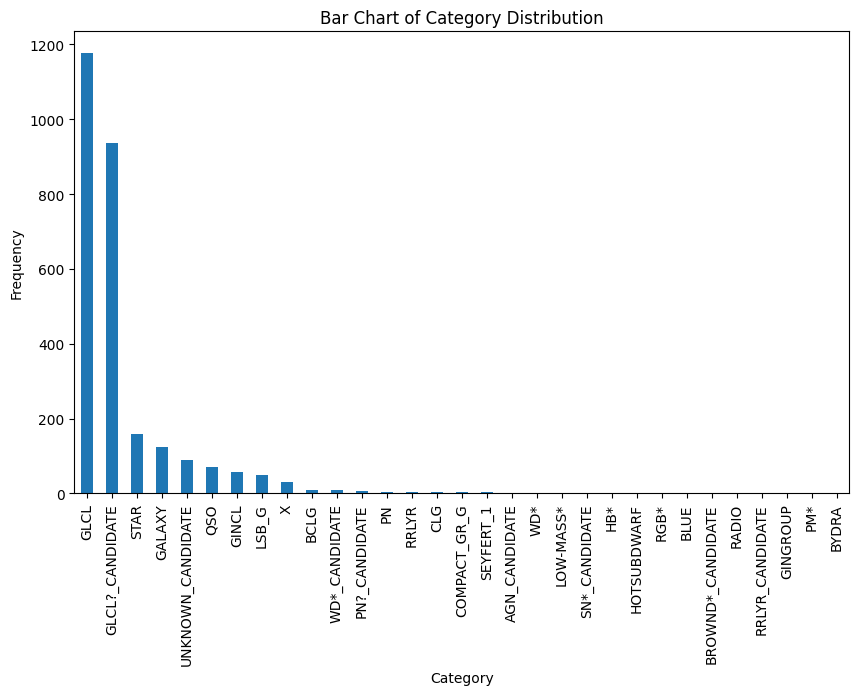

In [32]:
# Create and display the pie chart of the new column
category_counts = dft['main_type'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Bar Chart of Category Distribution')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

The number of different categories in the new grouped column: 3


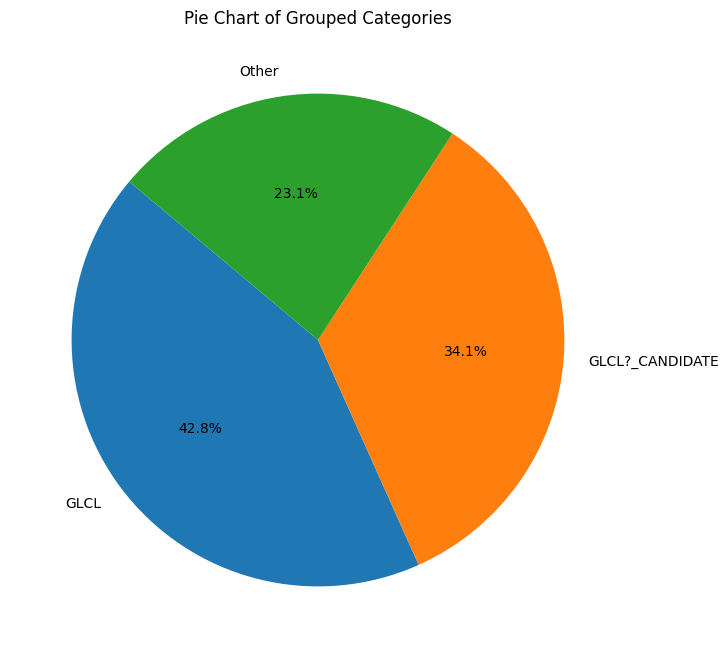

In [33]:
# Count the occurrences of each category
category_counts = dft['main_type'].value_counts()

# Specify the categorical column
category_column = 'main_type'

# Define the threshold for rare categories
threshold = 300  # Categories with counts less than or equal to this will be grouped into "Other"

# Count the occurrences of each category
category_counts = dft[category_column].value_counts()

# Identify the rare categories
rare_categories = category_counts[category_counts <= threshold].index

# Create a new column with grouped categories
dft['grouped_category'] = dft[category_column].apply(lambda x: 'Other' if x in rare_categories else x)

# Print the number of different categories in the new column
num_categories = dft['grouped_category'].nunique()
print(f'The number of different categories in the new grouped column: {num_categories}')



# Count the occurrences of each category
category_counts = dft['grouped_category'].value_counts()


# Create and display the pie chart of the new column
category_counts = dft['grouped_category'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Grouped Categories')
plt.show()

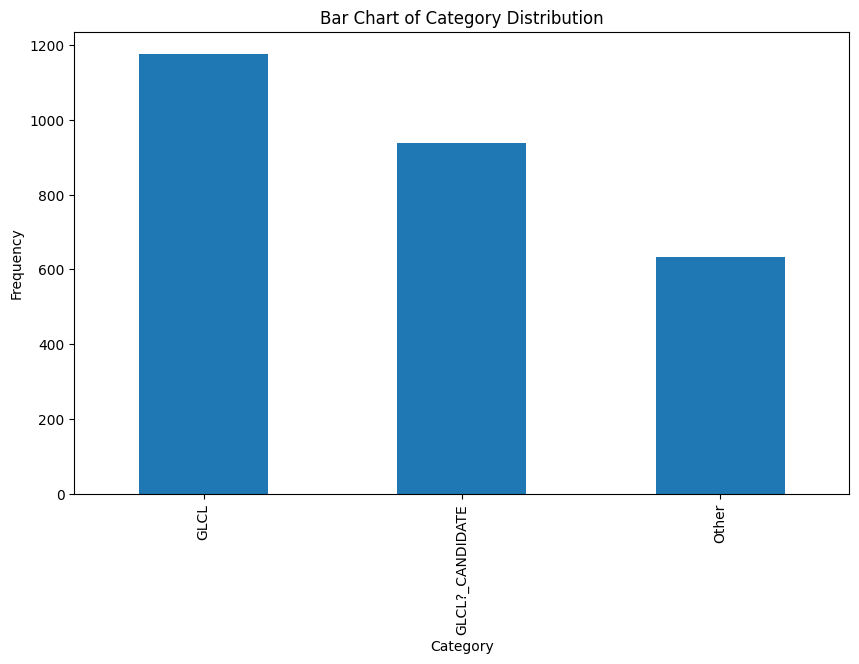

In [34]:
# Create a bar chart
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Bar Chart of Category Distribution')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

In [35]:
dft['grouped_category'].value_counts()

GLCL               1176
GLCL?_CANDIDATE     937
Other               634
Name: grouped_category, dtype: int64

In [36]:
dft.columns

Index(['umag', 'gmag', 'rmag', 'imag', 'zmag', 'uerr', 'gerr', 'rerr', 'ierr',
       'zerr', 'iC', 'iCerr', 'ebv', 'background_g', 'ug0', 'gi0', 'iz0',
       'p_star', 'p_gc', 'p_galx', 'main_type', 'grouped_category'],
      dtype='object')

In [37]:
dft = dft.drop(columns='main_type')

In [38]:
# Get the unique types in the 'grouped_category' column
unique_types = dft['grouped_category'].apply(type).unique()
print("Different types in 'grouped_category' column:", unique_types)

Different types in 'grouped_category' column: [<class 'str'>]


In [39]:
# Ensure all values in 'grouped_category' are strings
dft['grouped_category'] = dft['grouped_category'].astype(str)

In [40]:
df = dft.copy()

In [41]:
from sklearn.preprocessing import LabelEncoder
# Label Encoding
label_encoder = LabelEncoder()
df['main_type_encoded'] = label_encoder.fit_transform(df['grouped_category'])

# Save the encoder to disk
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']

In [42]:
df.columns

Index(['umag', 'gmag', 'rmag', 'imag', 'zmag', 'uerr', 'gerr', 'rerr', 'ierr',
       'zerr', 'iC', 'iCerr', 'ebv', 'background_g', 'ug0', 'gi0', 'iz0',
       'p_star', 'p_gc', 'p_galx', 'grouped_category', 'main_type_encoded'],
      dtype='object')

/tmp/ipykernel_40672/3090682606.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


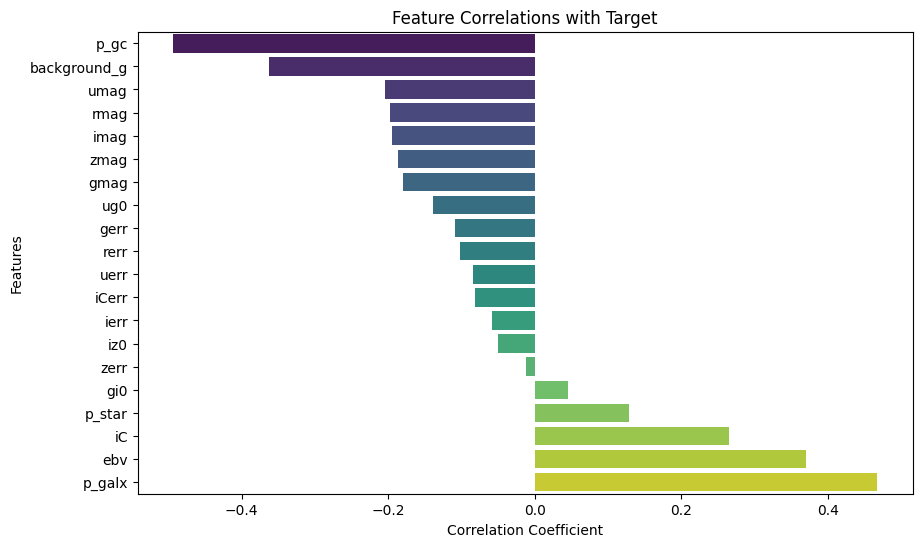

In [43]:
 # Calculate the correlation matrix
correlation_matrix = df.corr()

# Get the correlations of the features with the target
correlation_with_target = correlation_matrix['main_type_encoded'].drop('main_type_encoded')


# Sort correlations
sorted_correlations = correlation_with_target.sort_values()

# Plot the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_correlations.values, y=sorted_correlations.index, palette="viridis")
plt.title('Feature Correlations with Target')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

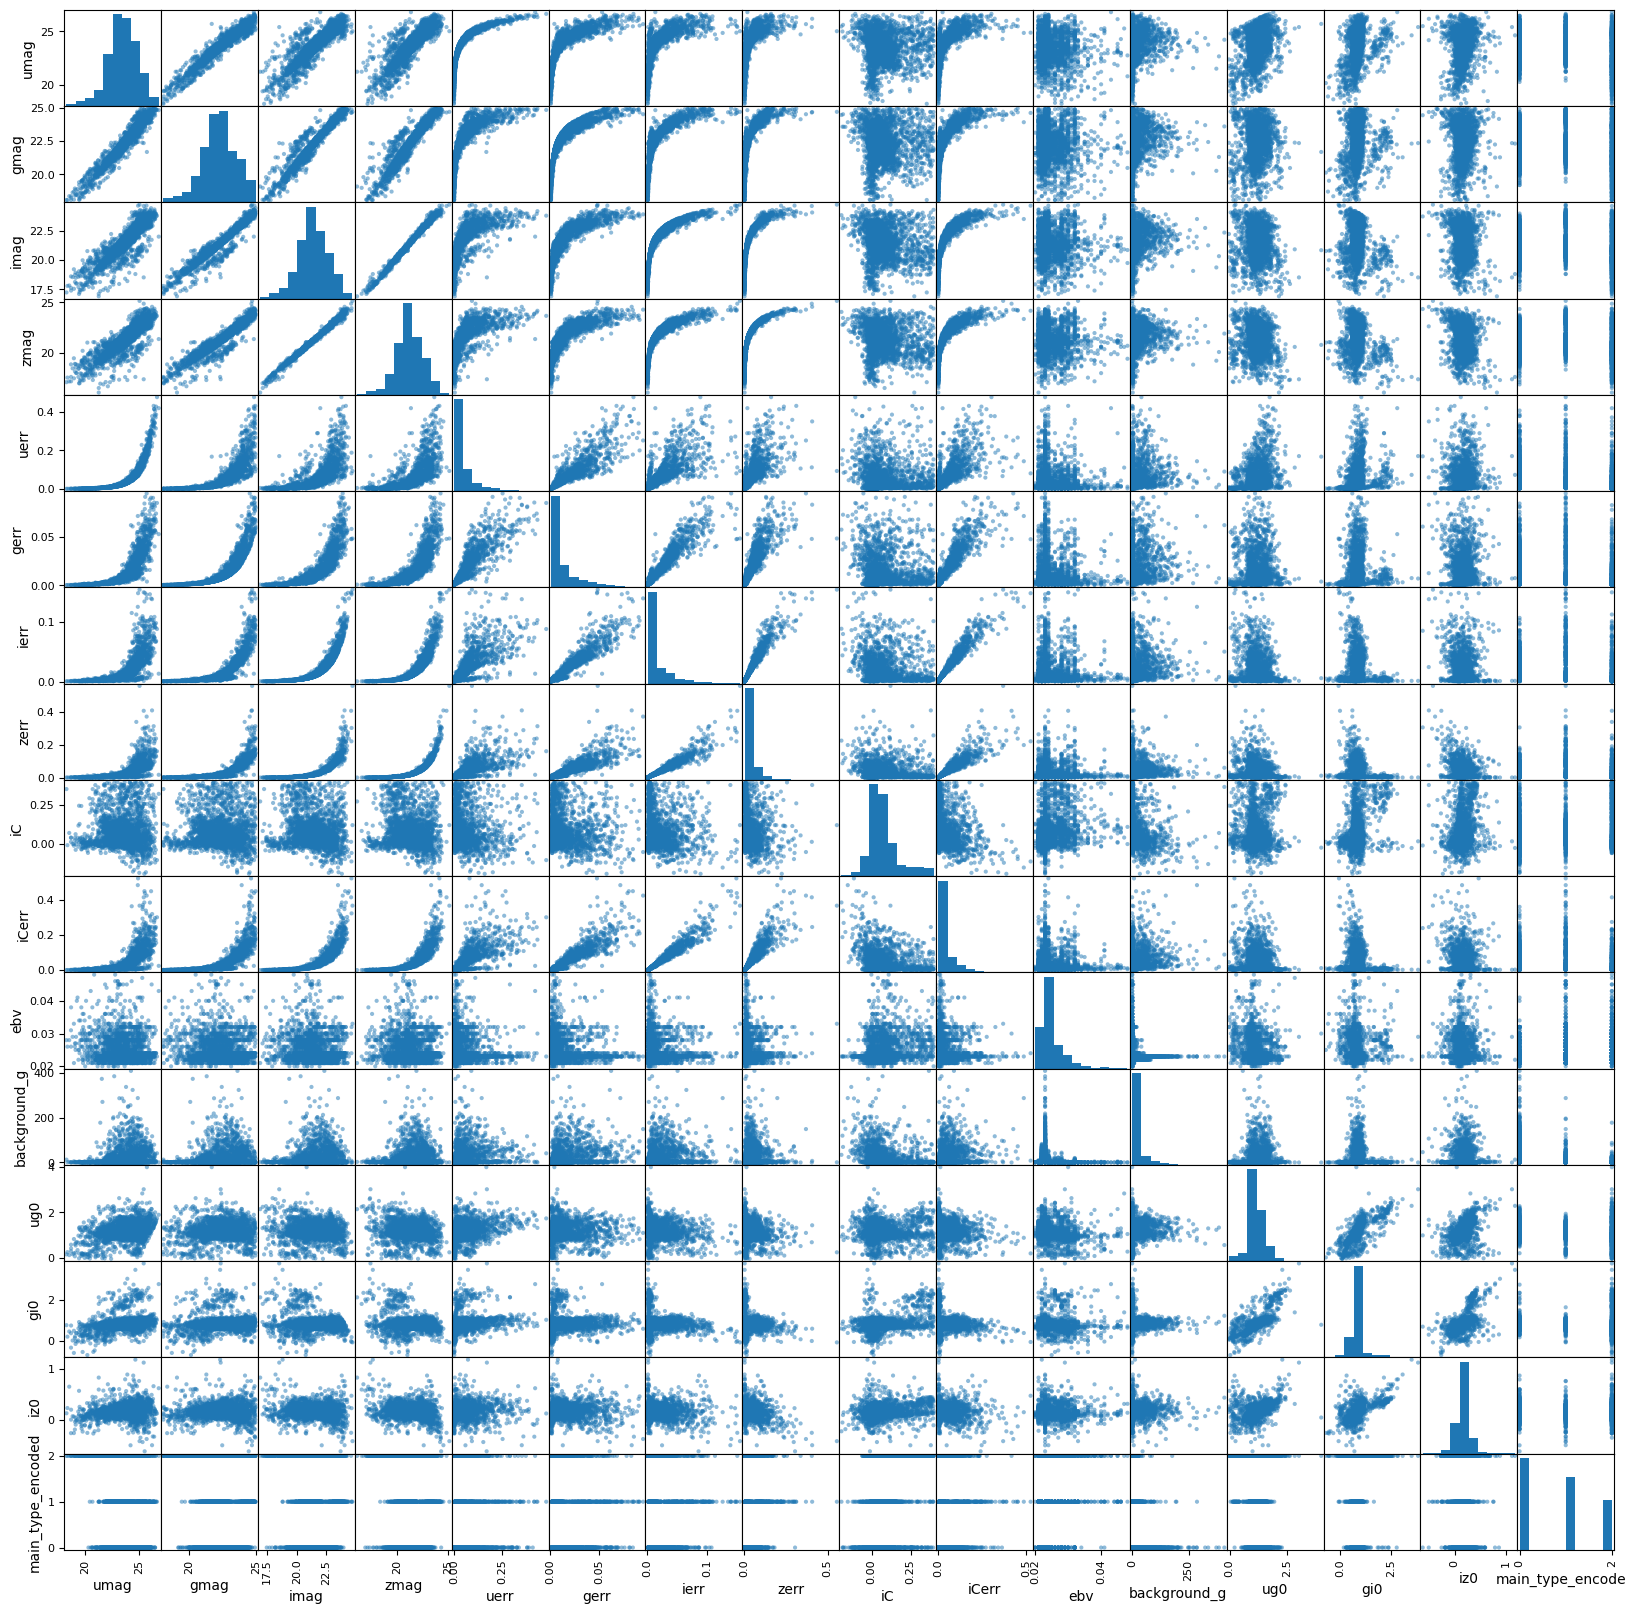

In [44]:
from pandas.plotting import scatter_matrix

attributes = [ 'umag', 'gmag', 'imag', 'zmag',
       'uerr', 'gerr', 'ierr', 'zerr', 'iC', 'iCerr', 'ebv', 'background_g',
       'ug0', 'gi0', 'iz0', 'main_type_encoded']
scatter_matrix(df[attributes], figsize=(20, 20))
plt.show()

In [45]:
# df = df.drop(columns=[ 'elongation','ik0' , 'ksmag', 'kserr', 'rmag', 'rerr', 'p_galx', 'p_star', 'p_gc', 'grouped_category'])
df = df.drop(columns=[ 'p_galx', 'p_star', 'p_gc', 'grouped_category'])

In [46]:
unlabeled_data.columns

Index(['umag', 'gmag', 'rmag', 'imag', 'zmag', 'uerr', 'gerr', 'rerr', 'ierr',
       'zerr', 'iC', 'iCerr', 'ebv', 'background_g', 'ug0', 'gi0', 'iz0',
       'p_star', 'p_gc', 'p_galx', 'main_type'],
      dtype='object')

In [47]:
unlabeled_data['main_type'].value_counts()

Series([], Name: main_type, dtype: int64)

In [48]:
unlabeled_data = unlabeled_data.drop(columns=[ 'p_galx', 'p_star', 'p_gc','main_type'])

In [49]:
unlabeled_data.columns

Index(['umag', 'gmag', 'rmag', 'imag', 'zmag', 'uerr', 'gerr', 'rerr', 'ierr',
       'zerr', 'iC', 'iCerr', 'ebv', 'background_g', 'ug0', 'gi0', 'iz0'],
      dtype='object')

In [50]:
from tabulate import tabulate

# Print the DataFrame columns in a tabulated format
columns = df.columns.tolist()
print(tabulate([[col] for col in columns], headers=['Columns'], tablefmt='grid'))

+-------------------+
| Columns           |
+===================+
| umag              |
+-------------------+
| gmag              |
+-------------------+
| rmag              |
+-------------------+
| imag              |
+-------------------+
| zmag              |
+-------------------+
| uerr              |
+-------------------+
| gerr              |
+-------------------+
| rerr              |
+-------------------+
| ierr              |
+-------------------+
| zerr              |
+-------------------+
| iC                |
+-------------------+
| iCerr             |
+-------------------+
| ebv               |
+-------------------+
| background_g      |
+-------------------+
| ug0               |
+-------------------+
| gi0               |
+-------------------+
| iz0               |
+-------------------+
| main_type_encoded |
+-------------------+


In [51]:
# Save the train and test datasets to CSV files
df.to_csv('/home/samanehjavadinia/Co-op/Data/modified_dataset.csv', index=False)
unlabeled_data.to_csv('/home/samanehjavadinia/Co-op/Data/unlabeled_data.csv', index=False)

#############LOading
###########
#######
#########
#########


In [52]:
# Importing necessary libraries
from astropy.table import Table
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import time

from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.utils import resample
import seaborn as sns
import joblib

In [53]:
# If you want to load the data later, you can use the following code
df = pd.read_csv('/home/samanehjavadinia/Co-op/Data/modified_dataset.csv')
unlabeled_data = pd.read_csv('/home/samanehjavadinia/Co-op/Data/unlabeled_data.csv')
# Load the encoder from disk
label_encoder = joblib.load('label_encoder.pkl')


In [54]:
# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['main_type_encoded'], random_state=42)
# Separate X and y for training and testing
X_train = train_df.drop(columns=['main_type_encoded'])
y_train = train_df['main_type_encoded']
X_test = test_df.drop(columns=['main_type_encoded'])
y_test = test_df['main_type_encoded']

In [55]:
X_train.head()

,umag,gmag,rmag,imag,zmag,uerr,gerr,rerr,ierr,zerr,iC,iCerr,ebv,background_g,ug0,gi0,iz0
2414,22.410900,21.546101,21.143400,20.987301,20.934200,0.00885,0.00375,0.00375,0.0060,0.01140,0.0089,0.016248,0.029,0.072944,0.837859,0.512893,0.039093
299,23.841200,22.377300,21.720800,21.365200,21.111799,0.03690,0.00720,0.00840,0.0087,0.01845,0.0167,0.023517,0.024,1.610410,1.441604,0.974108,0.241808
1511,23.096100,21.744499,21.141899,20.809900,20.578400,0.01815,0.00480,0.00465,0.0057,0.00900,0.0255,0.014788,0.024,11.504100,1.329304,0.896608,0.219908
2365,22.774200,21.395399,21.153900,21.263399,21.297199,0.01410,0.00330,0.00345,0.0075,0.01890,-0.0078,0.016132,0.029,-0.079300,1.351859,0.086093,-0.047807
593,23.672701,22.373600,21.893700,21.493700,21.269800,0.03255,0.00915,0.01050,0.0111,0.01815,0.0119,0.029336,0.022,37.787498,1.278662,0.845074,0.213274


In [56]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

def scale_numeric_columns(train_df, test_df):
    # Identify non-numeric and numeric columns
    non_numeric_columns = train_df.select_dtypes(include=['object']).columns
    numeric_columns = train_df.select_dtypes(exclude=['object']).columns

    # Separate non-numeric and numeric columns
    train_non_numeric = train_df[non_numeric_columns]
    train_numeric = train_df[numeric_columns]

    test_non_numeric = test_df[non_numeric_columns]
    test_numeric = test_df[numeric_columns]

    # Handle missing values in numeric columns
    train_numeric = train_numeric.dropna()
    test_numeric = test_numeric.dropna()


    # Scale the numeric columns
    scaler = MinMaxScaler()
    train_numeric_scaled = scaler.fit_transform(train_numeric)
    test_numeric_scaled = scaler.transform(test_numeric)

    # Convert the scaled array back to DataFrames
    train_numeric_scaled = pd.DataFrame(train_numeric_scaled, columns=numeric_columns)
    test_numeric_scaled = pd.DataFrame(test_numeric_scaled, columns=numeric_columns)

    # Combine the scaled numeric columns with the non-numeric columns
    train_scaled = pd.concat([train_numeric_scaled, train_non_numeric.reset_index(drop=True)], axis=1)
    test_scaled = pd.concat([test_numeric_scaled, test_non_numeric.reset_index(drop=True)], axis=1)

    return train_scaled, test_scaled

# Example usage
# df = pd.read_csv('your_dataset.csv')  # Load your dataset
X_train_scaled, X_test_scaled = scale_numeric_columns(X_train, X_test)
# print("Scaled train data:", X_train_scaled.head())
# print("Scaled test data:", X_test_scaled.head())


In [57]:
X_train.head()

,umag,gmag,rmag,imag,zmag,uerr,gerr,rerr,ierr,zerr,iC,iCerr,ebv,background_g,ug0,gi0,iz0
2414,22.410900,21.546101,21.143400,20.987301,20.934200,0.00885,0.00375,0.00375,0.0060,0.01140,0.0089,0.016248,0.029,0.072944,0.837859,0.512893,0.039093
299,23.841200,22.377300,21.720800,21.365200,21.111799,0.03690,0.00720,0.00840,0.0087,0.01845,0.0167,0.023517,0.024,1.610410,1.441604,0.974108,0.241808
1511,23.096100,21.744499,21.141899,20.809900,20.578400,0.01815,0.00480,0.00465,0.0057,0.00900,0.0255,0.014788,0.024,11.504100,1.329304,0.896608,0.219908
2365,22.774200,21.395399,21.153900,21.263399,21.297199,0.01410,0.00330,0.00345,0.0075,0.01890,-0.0078,0.016132,0.029,-0.079300,1.351859,0.086093,-0.047807
593,23.672701,22.373600,21.893700,21.493700,21.269800,0.03255,0.00915,0.01050,0.0111,0.01815,0.0119,0.029336,0.022,37.787498,1.278662,0.845074,0.213274


########### Training on XGBoost
############
############
###########
###########

Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       235
           1       0.66      0.72      0.69       188
           2       0.88      0.86      0.87       127

    accuracy                           0.75       550
   macro avg       0.76      0.76      0.76       550
weighted avg       0.75      0.75      0.75       550

Label Mapping: {'GLCL': 0, 'GLCL?_CANDIDATE': 1, 'Other': 2}
['GLCL', 'GLCL?_CANDIDATE', 'Other']


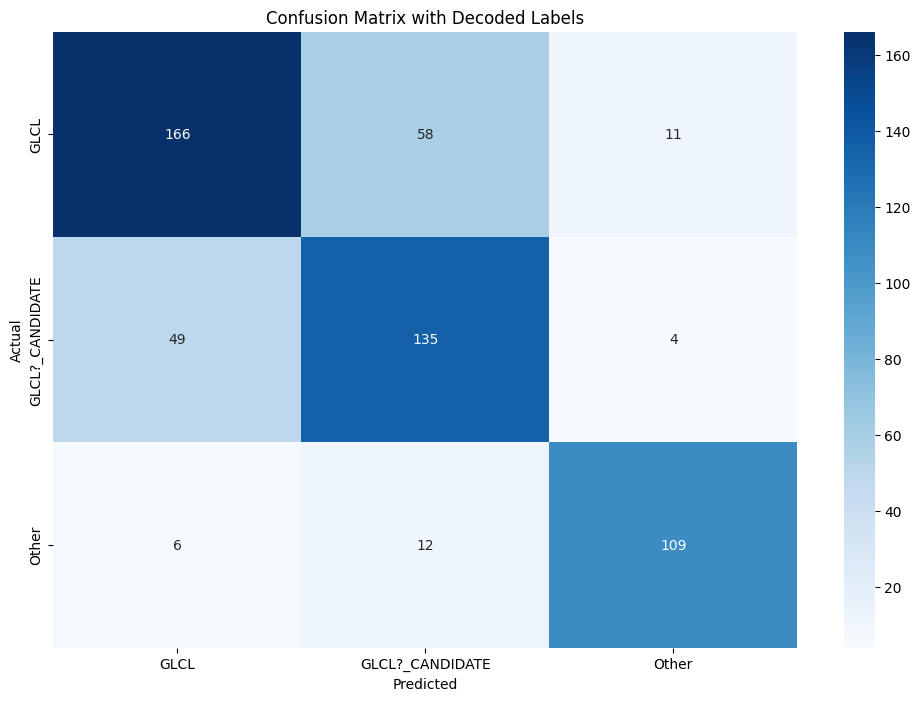

Model saved to xgboost_model.pkl


In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import xgboost as xgb
import xgboost as xgb
# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False)

# Train the classifier
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

# Print the mapping between original labels and encoded values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

# Decode the labels using the dictionary
decoded_labels = [key for key in sorted(label_mapping, key=label_mapping.get)]
print(decoded_labels)

# Plot the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=decoded_labels, yticklabels=decoded_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with Decoded Labels')
plt.show()

# Save the trained model to a file
model_filename = 'xgboost_model.pkl'
joblib.dump(xgb_classifier, model_filename)
print(f'Model saved to {model_filename}')

In [59]:
# Get the index of the label 'GLCL'
glcl_index = label_mapping["GLCL"]

# Extract the row and column corresponding to 'GLCL' in the confusion matrix
glcl_conf_matrix_row = conf_matrix[glcl_index, :]
glcl_conf_matrix_col = conf_matrix[:, glcl_index]

# Calculate the number of true positives, false positives, false negatives, and true negatives for 'GLCL'
true_positives_glcl = glcl_conf_matrix_row[glcl_index]
false_positives_glcl = sum(glcl_conf_matrix_col) - true_positives_glcl
false_negatives_glcl = sum(glcl_conf_matrix_row) - true_positives_glcl
true_negatives_glcl = np.sum(conf_matrix) - (true_positives_glcl + false_positives_glcl + false_negatives_glcl)

# Calculate the accuracy for 'GLCL'
accuracy_glcl = (true_positives_glcl + true_negatives_glcl) / np.sum(conf_matrix)

print(f'Number of correct predictions for label GLCL: {true_positives_glcl}')
print(f'Number of false predictions for label GLCL: {false_negatives_glcl + false_positives_glcl}')
print(f'Accuracy for label GLCL: {accuracy_glcl:.2f}')



Number of correct predictions for label GLCL: 166
Number of false predictions for label GLCL: 124
Accuracy for label GLCL: 0.77


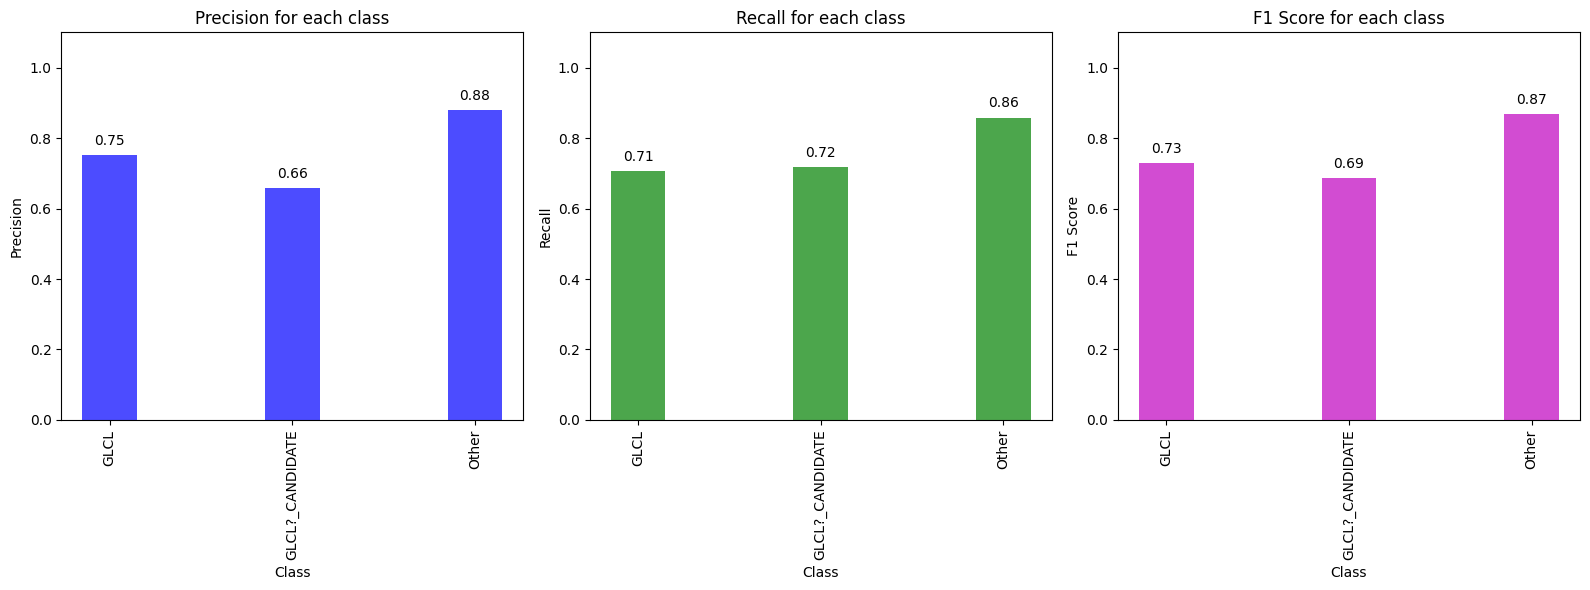

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Number of classes
num_classes = conf_matrix.shape[0]

# Initialize lists to store precision, recall, and f1 score for each label
precisions = []
recalls = []
f1_scores = []



# Calculate precision, recall, and f1 score for each class
for i in range(num_classes):
    tp = conf_matrix[i, i]
    fp = np.sum(conf_matrix[:, i]) - tp
    fn = np.sum(conf_matrix[i, :]) - tp

    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)

# Plot Precision, Recall, and F1 Score for each class
labels = list(label_mapping.keys())
x = np.arange(len(labels))
bar_width = 0.3

plt.figure(figsize=(16, 6))

# Plot Precision
plt.subplot(1, 3, 1)
plt.bar(x, precisions, width=bar_width, color='b', alpha=0.7)
plt.xticks(x, labels, rotation=90)
plt.xlabel('Class')
plt.ylabel('Precision')
plt.title('Precision for each class')
plt.ylim(0, 1.1)
for i, v in enumerate(precisions):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom', color='black')

# Plot Recall
plt.subplot(1, 3, 2)
plt.bar(x, recalls, width=bar_width, color='g', alpha=0.7)
plt.xticks(x, labels, rotation=90)
plt.xlabel('Class')
plt.ylabel('Recall')
plt.title('Recall for each class')
plt.ylim(0, 1.1)
for i, v in enumerate(recalls):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom', color='black')

# Plot F1 Score
plt.subplot(1, 3, 3)
plt.bar(x, f1_scores, width=bar_width, color='m', alpha=0.7)
plt.xticks(x, labels, rotation=90)
plt.xlabel('Class')
plt.ylabel('F1 Score')
plt.title('F1 Score for each class')
plt.ylim(0, 1.1)
for i, v in enumerate(f1_scores):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()


###########Training on xgboost with binary classification#########

In [61]:
y_train.value_counts()

0    941
1    749
2    507
Name: main_type_encoded, dtype: int64

In [62]:
y_test.value_counts()

0    235
1    188
2    127
Name: main_type_encoded, dtype: int64

In [63]:
X_train.columns

Index(['umag', 'gmag', 'rmag', 'imag', 'zmag', 'uerr', 'gerr', 'rerr', 'ierr',
       'zerr', 'iC', 'iCerr', 'ebv', 'background_g', 'ug0', 'gi0', 'iz0'],
      dtype='object')

Optimal Threshold: 0.21
Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.70      0.77       315
           1       0.67      0.82      0.74       235

    accuracy                           0.75       550
   macro avg       0.76      0.76      0.75       550
weighted avg       0.77      0.75      0.76       550



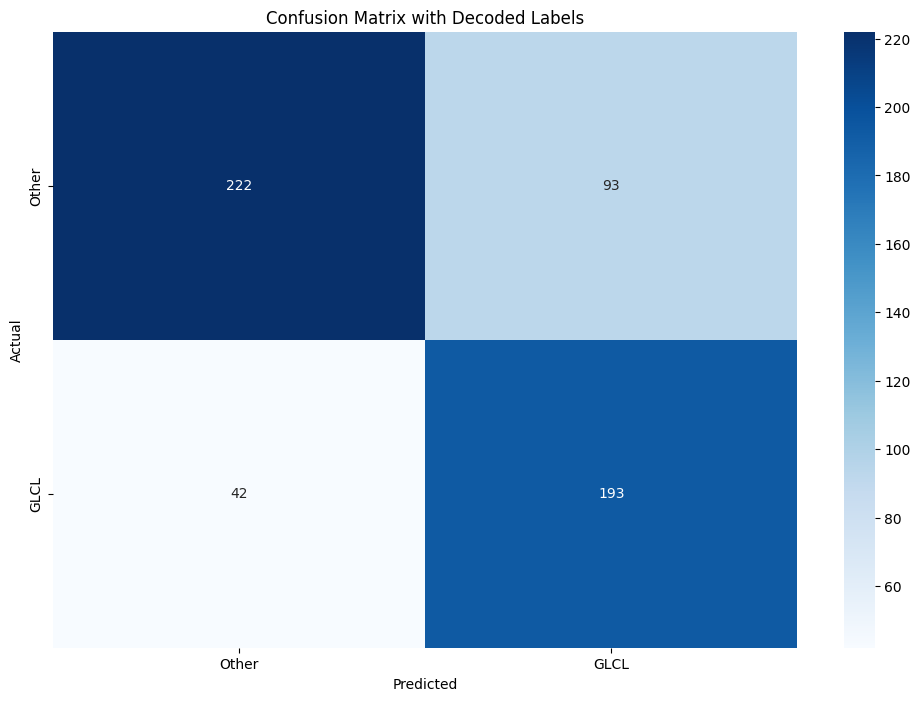

Model saved to xgboost_model_Binary_Classification.pkl


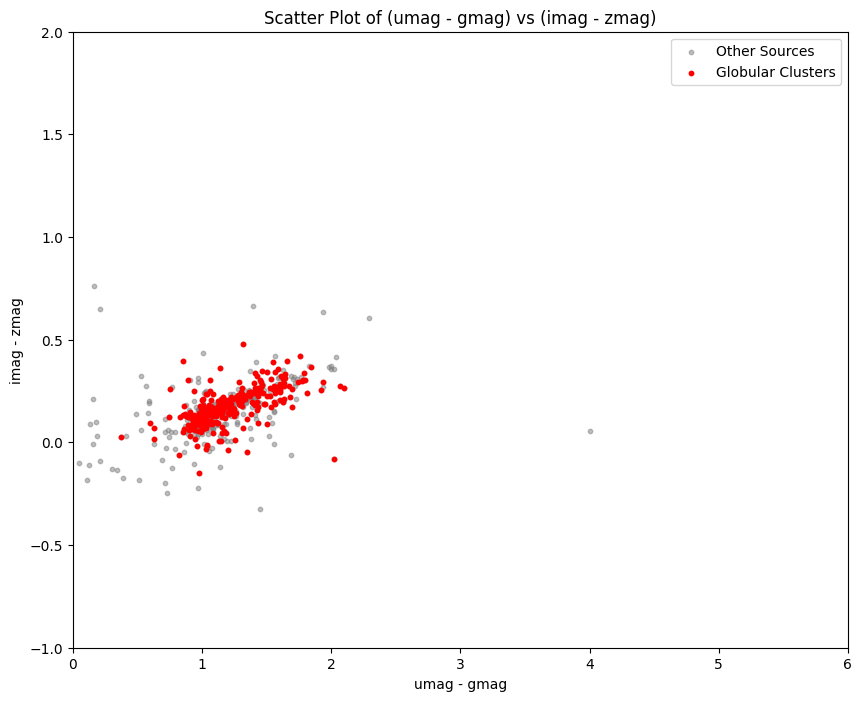

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import xgboost as xgb
import xgboost as xgb

# Decode the encoded labels back to the original labels
y_train_decoded = label_encoder.inverse_transform(y_train)
y_test_decoded = label_encoder.inverse_transform(y_test)



# Important class
important_class = "GLCL"

# Converting to binary labels
y_train_binary = pd.Series([1 if label == important_class else 0 for label in y_train_decoded])
y_test_binary = pd.Series([1 if label == important_class else 0 for label in y_test_decoded])

# Create a mapping for visualization
binary_to_original_mapping = {
    1: important_class,
    0: 'Other'
}

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False)

# Train the classifier
xgb_classifier.fit(X_train, y_train_binary)

# Make predictions on the test set

# y_pred = xgb_classifier.predict(X_test)
y_pred_proba = xgb_classifier.predict_proba(X_test)[:, 1]




# Determine the optimal threshold using precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test_binary, y_pred_proba)
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_threshold = thresholds[np.argmax(f1_scores)]

print(f'Optimal Threshold: {optimal_threshold:.2f}')

# Apply the optimal threshold to the predictions
y_pred = (y_pred_proba >= optimal_threshold).astype(int)

# Evaluate the classifier
accuracy = accuracy_score(y_test_binary, y_pred)
report = classification_report(y_test_binary, y_pred)
conf_matrix = confusion_matrix(y_test_binary, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

# Decode the labels using the dictionary
decoded_labels = [binary_to_original_mapping[key] for key in sorted(binary_to_original_mapping)]


# Plot the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=decoded_labels, yticklabels=decoded_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with Decoded Labels')
plt.show()

# Save the trained model to a file
model_filename = 'xgboost_model_Binary_Classification.pkl'
joblib.dump(xgb_classifier, model_filename)
print(f'Model saved to {model_filename}')


# Scatter plot of (umag - gmag) vs (imag - zmag) with globular clusters highlighted
plt.figure(figsize=(10, 8))  # Create a figure with specified size

# Plot other sources
plt.scatter(
    X_test['umag'] - X_test['gmag'],  # Difference between umag and gmag for x-axis
    X_test['imag'] - X_test['zmag'],  # Difference between imag and zmag for y-axis
    c='gray',  # Color for these points
    s=10,
    alpha=0.5,  # Transparency level
    label='Other Sources'  # Label for legend
)

# Highlight globular clusters
plt.scatter(
    X_test['umag'][y_pred == 1] - X_test['gmag'][y_pred == 1],  # x-axis values for predicted globular clusters
    X_test['imag'][y_pred == 1] - X_test['zmag'][y_pred == 1],  # y-axis values for predicted globular clusters
    c='red',  # Color for these points
    s=10,
    label='Globular Clusters'  # Label for legend
)

# Add labels and title
plt.xlabel('umag - gmag')  # Label for x-axis
plt.ylabel('imag - zmag')  # Label for y-axis
plt.xlim(0, 6)  # Limit the range for x-axis
plt.ylim(-1, 2)  # Limit the range for y-axis
plt.legend()  # Add legend to the plot
plt.title('Scatter Plot of (umag - gmag) vs (imag - zmag)')  # Title of the plot

# Display the plot
plt.show()





In [65]:
unlabeled_data.shape

(87403, 17)

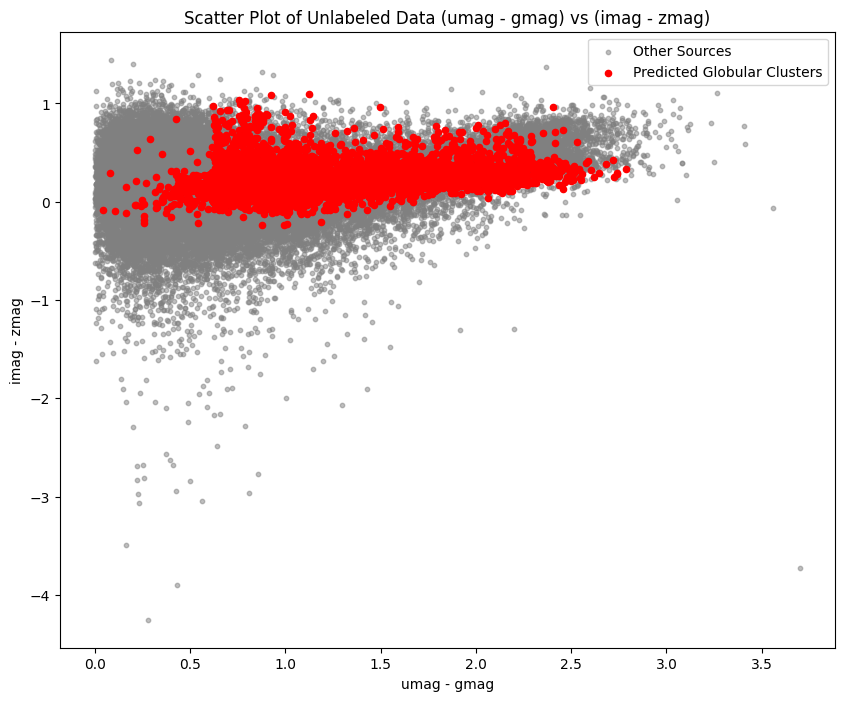

In [66]:
# Make predictions on the unlabeled dataset
unlabeled_data_proba = xgb_classifier.predict_proba(unlabeled_data)[:, 1]
unlabeled_data_pred = (unlabeled_data_proba >= optimal_threshold).astype(int)


# Scatter plot for the unlabeled data
plt.figure(figsize=(10, 8))  # Create a figure with specified size

# Plot other sources
plt.scatter(
    unlabeled_data['umag'] - unlabeled_data['gmag'],  # Difference between umag and gmag for x-axis
    unlabeled_data['imag'] - unlabeled_data['zmag'],  # Difference between imag and zmag for y-axis
    c='gray',  # Color for these points
    s=10,
    alpha=0.5,  # Transparency level
    label='Other Sources'  # Label for legend
)

# Highlight predicted globular clusters
plt.scatter(
    unlabeled_data['umag'][unlabeled_data_pred == 1] - unlabeled_data['gmag'][unlabeled_data_pred == 1],  # x-axis values for predicted globular clusters
    unlabeled_data['imag'][unlabeled_data_pred == 1] - unlabeled_data['zmag'][unlabeled_data_pred == 1],  # y-axis values for predicted globular clusters
    c='red',  # Color for these points
    s=20,
    label='Predicted Globular Clusters'  # Label for legend
)

# Add labels and title
plt.xlabel('umag - gmag')  # Label for x-axis
plt.ylabel('imag - zmag')  # Label for y-axis
# plt.xlim(0, 6)  # Limit the range for x-axis
# plt.ylim(-1, 2)  # Limit the range for y-axis
plt.legend()  # Add legend to the plot
plt.title('Scatter Plot of Unlabeled Data (umag - gmag) vs (imag - zmag)')  # Title of the plot

# Display the plot
plt.show()

/home/samanehjavadinia/.conda/envs/p120/lib/python3.8/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


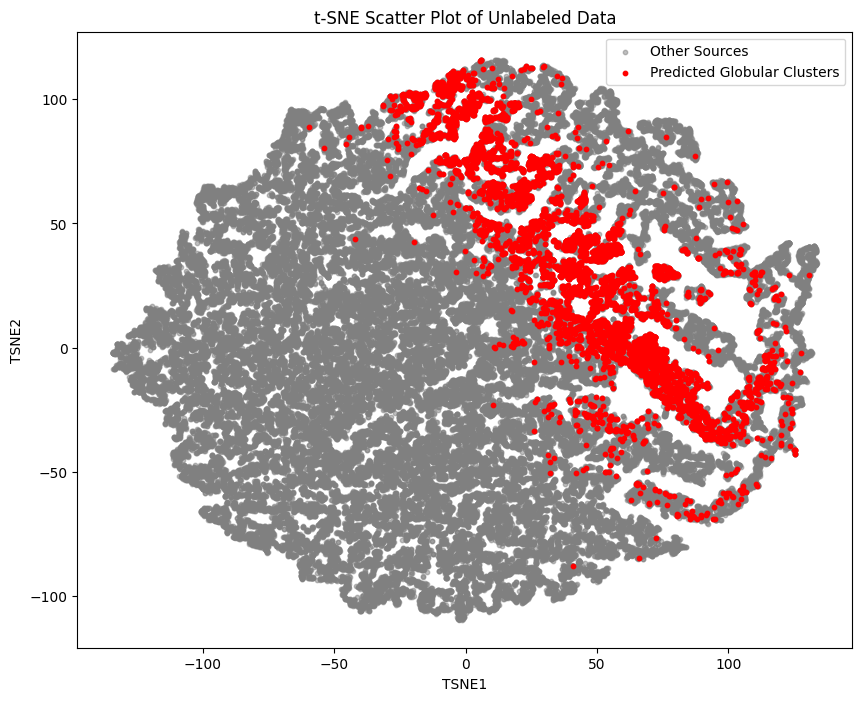

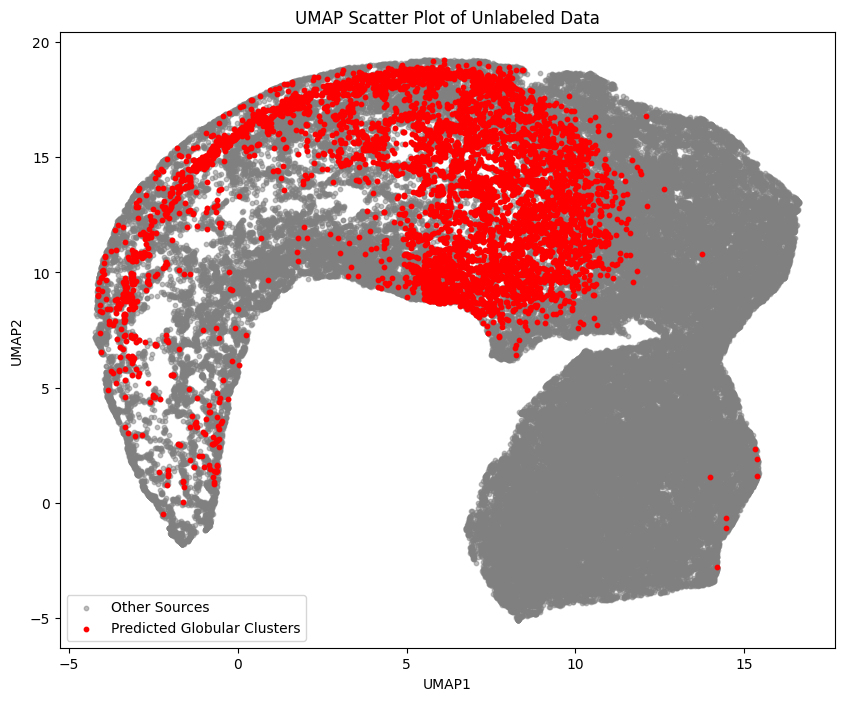

In [67]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


# Select the relevant columns for dimensionality reduction
features = ['umag', 'gmag', 'rmag', 'imag', 'zmag', ]
unlabeled_data_features = unlabeled_data[features]

# Standardize the data
tsne_scaler = StandardScaler()
unlabeled_data_scaled = tsne_scaler.fit_transform(unlabeled_data_features)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(unlabeled_data_scaled)

# Create a DataFrame for the t-SNE results
tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'],  index=unlabeled_data.index)

# Apply UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_results = umap_model.fit_transform(unlabeled_data_scaled)

# Create a DataFrame for the UMAP results
umap_df = pd.DataFrame(umap_results, columns=['UMAP1', 'UMAP2'],  index=unlabeled_data.index)


# Visualize t-SNE results
plt.figure(figsize=(10, 8))
plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], c='gray', s=10, alpha=0.5, label='Other Sources')
plt.scatter(tsne_df['TSNE1'][unlabeled_data_pred == 1], tsne_df['TSNE2'][unlabeled_data_pred == 1], c='red', s=10, label='Predicted Globular Clusters')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.legend()
plt.title('t-SNE Scatter Plot of Unlabeled Data')
plt.show()

# Visualize UMAP results
plt.figure(figsize=(10, 8))
plt.scatter(umap_df['UMAP1'], umap_df['UMAP2'], c='gray', s=10, alpha=0.5, label='Other Sources')
plt.scatter(umap_df['UMAP1'][unlabeled_data_pred == 1], umap_df['UMAP2'][unlabeled_data_pred == 1], c='red', s=10, label='Predicted Globular Clusters')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend()
plt.title('UMAP Scatter Plot of Unlabeled Data')
plt.show()


dict_items([(1, 'GLCL'), (0, 'Other')])
Processing index: 1, label: GLCL
Index is 1
Processing index: 0, label: Other
Index is 0


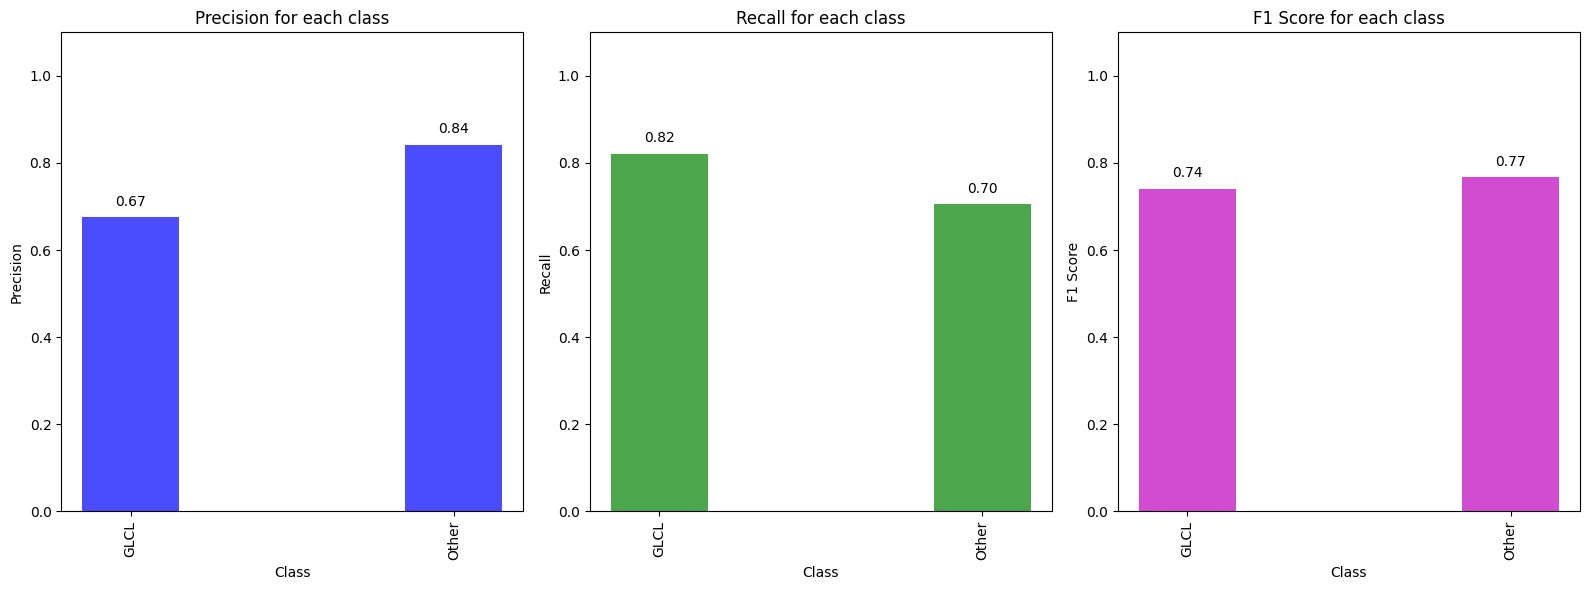

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists to store precision, recall, accuracy, and F1 score for each label
precisions = []
recalls = []
f1_scores = []

print(binary_to_original_mapping.items())

# Calculate precision, recall, accuracy, and F1 score for each label
for index, label in binary_to_original_mapping.items():  # Swap label and index
    print(f"Processing index: {index}, label: {label}")
    
    if index == 1:
        print("Index is 1")
        # True Positives (TP): Diagonal element for the current label
        tp = conf_matrix[1, 1]

        # False Positives (FP): Sum of the column for the current label excluding the diagonal element
        fp = conf_matrix[0, 1]

        # False Negatives (FN): Sum of the row for the current label excluding the diagonal element
        fn = conf_matrix[1, 0]

        # True Negatives (TN): Sum of all elements in the matrix excluding the current row and column
        tn = conf_matrix[0, 0]
    elif index == 0:
        print("Index is 0")
        # True Positives (TP): Diagonal element for the current label
        tp = conf_matrix[0, 0]

        # False Positives (FP): Sum of the column for the current label excluding the diagonal element
        fp = conf_matrix[1, 0]

        # False Negatives (FN): Sum of the row for the current label excluding the diagonal element
        fn = conf_matrix[0, 1]

        # True Negatives (TN): Sum of all elements in the matrix excluding the current row and column
        tn = conf_matrix[1, 1]
    else:
        assert False, f"Unexpected label value: {index}"  # Assert for unexpected values
        print("Index is neither 0 nor 1, skipping this index")
        continue  # Skip labels not covered in the binary mapping

    # Calculate Precision
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    precisions.append(precision)

    # Calculate Recall
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0
    recalls.append(recall)

    # Calculate F1 Score
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    f1_scores.append(f1_score)

# Plot Precision, Recall, and F1 Score for each label
labels = list(binary_to_original_mapping.values())
x = np.arange(len(labels))

bar_width = 0.3

plt.figure(figsize=(16, 6))

# Plot Precision
plt.subplot(1, 3, 1)
plt.bar(x, precisions, width=bar_width, color='b', alpha=0.7)
plt.xticks(x, labels, rotation=90)
plt.xlabel('Class')
plt.ylabel('Precision')
plt.title('Precision for each class')
plt.ylim(0, 1.1)
for i, v in enumerate(precisions):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom', color='black')

# Plot Recall
plt.subplot(1, 3, 2)
plt.bar(x, recalls, width=bar_width, color='g', alpha=0.7)
plt.xticks(x, labels, rotation=90)
plt.xlabel('Class')
plt.ylabel('Recall')
plt.title('Recall for each class')
plt.ylim(0, 1.1)
for i, v in enumerate(recalls):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom', color='black')

# Plot F1 Score
plt.subplot(1, 3, 3)
plt.bar(x, f1_scores, width=bar_width, color='m', alpha=0.7)
plt.xticks(x, labels, rotation=90)
plt.xlabel('Class')
plt.ylabel('F1 Score')
plt.title('F1 Score for each class')
plt.ylim(0, 1.1)
for i, v in enumerate(f1_scores):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()

########### Training on Random Forest
############
############
###########
###########

Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       235
           1       0.67      0.74      0.71       188
           2       0.81      0.76      0.79       127

    accuracy                           0.73       550
   macro avg       0.74      0.74      0.74       550
weighted avg       0.74      0.73      0.73       550

Label Mapping: {'GLCL': 0, 'GLCL?_CANDIDATE': 1, 'Other': 2}
['GLCL', 'GLCL?_CANDIDATE', 'Other']


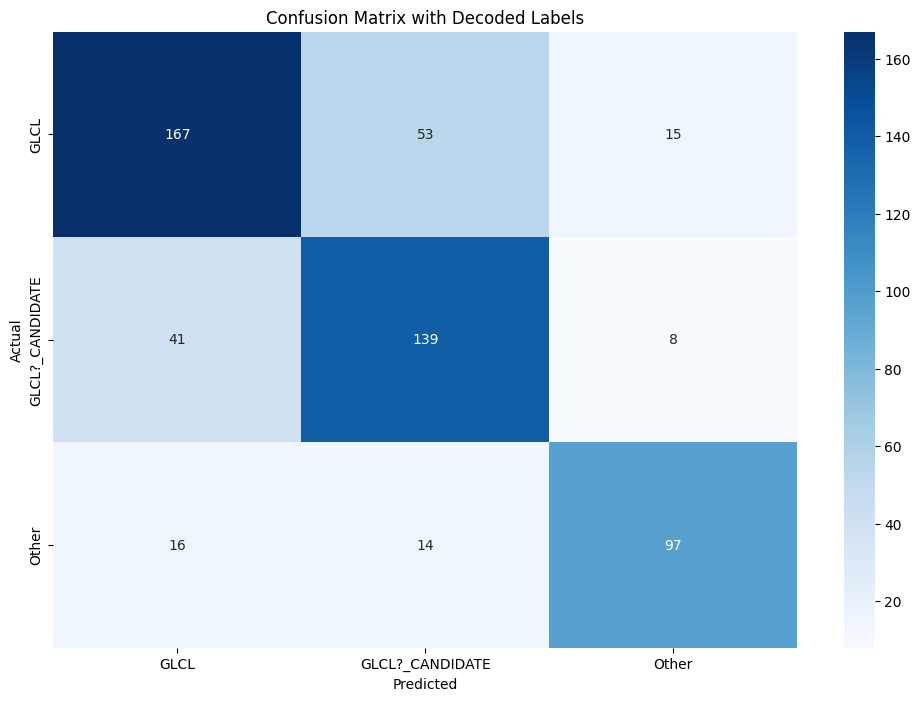

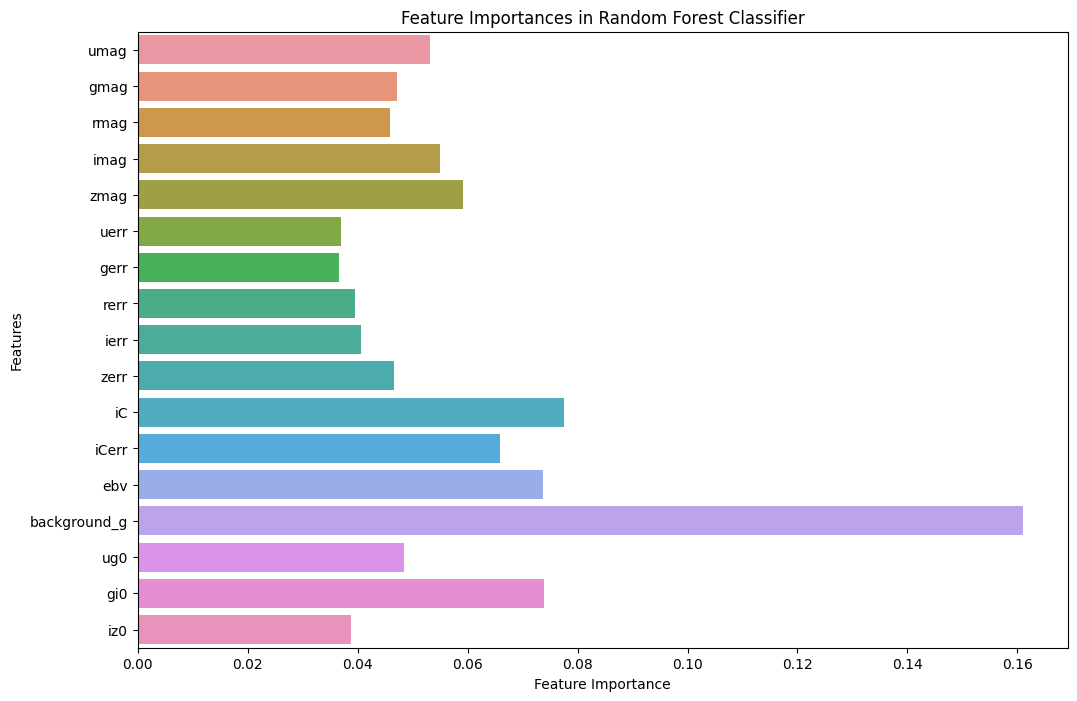

Model saved to random_forest_model.pkl


In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

# Print the mapping between original labels and encoded values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

# Decode the labels using the dictionary
decoded_labels = [key for key in sorted(label_mapping, key=label_mapping.get)]
print(decoded_labels)

# Plot the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=decoded_labels, yticklabels=decoded_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with Decoded Labels')
plt.show()


# Feature importance
feature_importances = rf_classifier.feature_importances_
features = X_train.columns

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances, y=features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances in Random Forest Classifier')
plt.show()

# Save the trained model to a file
model_filename = 'random_forest_model.pkl'
joblib.dump(rf_classifier, model_filename)
print(f'Model saved to {model_filename}')

In [70]:
#  Get the index of the label 'GLCL'
glcl_index = label_mapping["GLCL"]

# Extract the row and column corresponding to 'GLCL' in the confusion matrix
glcl_conf_matrix_row = conf_matrix[glcl_index, :]
glcl_conf_matrix_col = conf_matrix[:, glcl_index]

# Calculate the number of true positives, false positives, false negatives, and true negatives for 'GLCL'
true_positives_glcl = glcl_conf_matrix_row[glcl_index]
false_positives_glcl = sum(glcl_conf_matrix_col) - true_positives_glcl
false_negatives_glcl = sum(glcl_conf_matrix_row) - true_positives_glcl
true_negatives_glcl = np.sum(conf_matrix) - (true_positives_glcl + false_positives_glcl + false_negatives_glcl)

# Calculate the accuracy for 'GLCL'
accuracy_glcl = (true_positives_glcl + true_negatives_glcl) / np.sum(conf_matrix)

print(f'Number of correct predictions for label GLCL: {true_positives_glcl}')
print(f'Number of false predictions for label GLCL: {false_negatives_glcl + false_positives_glcl}')
print(f'Accuracy for label GLCL: {accuracy_glcl:.2f}')



Number of correct predictions for label GLCL: 167
Number of false predictions for label GLCL: 125
Accuracy for label GLCL: 0.77


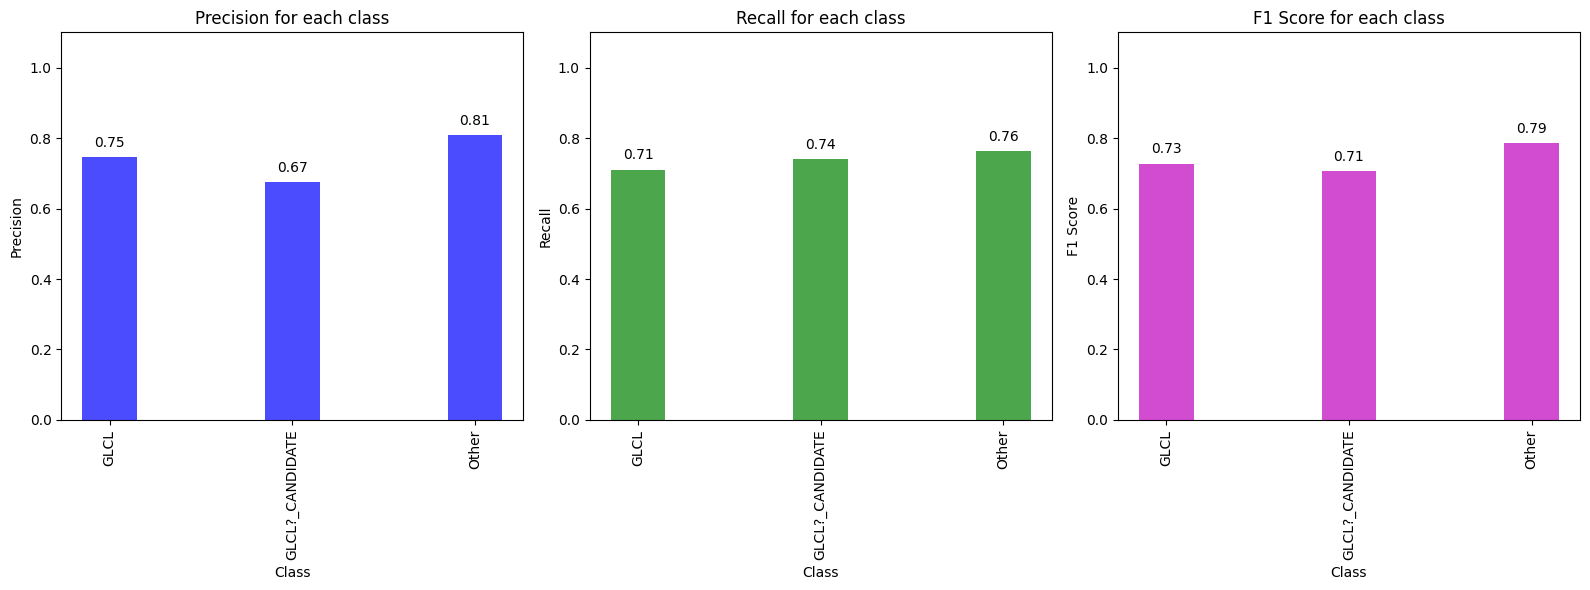

In [71]:
import matplotlib.pyplot as plt
import numpy as np

# Number of classes
num_classes = conf_matrix.shape[0]

# Initialize lists to store precision, recall, and f1 score for each label
precisions = []
recalls = []
f1_scores = []



# Calculate precision, recall, and f1 score for each class
for i in range(num_classes):
    tp = conf_matrix[i, i]
    fp = np.sum(conf_matrix[:, i]) - tp
    fn = np.sum(conf_matrix[i, :]) - tp

    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)

# Plot Precision, Recall, and F1 Score for each class
labels = list(label_mapping.keys())
x = np.arange(len(labels))
bar_width = 0.3

plt.figure(figsize=(16, 6))

# Plot Precision
plt.subplot(1, 3, 1)
plt.bar(x, precisions, width=bar_width, color='b', alpha=0.7)
plt.xticks(x, labels, rotation=90)
plt.xlabel('Class')
plt.ylabel('Precision')
plt.title('Precision for each class')
plt.ylim(0, 1.1)
for i, v in enumerate(precisions):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom', color='black')

# Plot Recall
plt.subplot(1, 3, 2)
plt.bar(x, recalls, width=bar_width, color='g', alpha=0.7)
plt.xticks(x, labels, rotation=90)
plt.xlabel('Class')
plt.ylabel('Recall')
plt.title('Recall for each class')
plt.ylim(0, 1.1)
for i, v in enumerate(recalls):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom', color='black')

# Plot F1 Score
plt.subplot(1, 3, 3)
plt.bar(x, f1_scores, width=bar_width, color='m', alpha=0.7)
plt.xticks(x, labels, rotation=90)
plt.xlabel('Class')
plt.ylabel('F1 Score')
plt.title('F1 Score for each class')
plt.ylim(0, 1.1)
for i, v in enumerate(f1_scores):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()

######## Training on random Forest by Binarization #######

Accuracy: 0.77
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       315
           1       0.77      0.66      0.71       235

    accuracy                           0.77       550
   macro avg       0.77      0.76      0.76       550
weighted avg       0.77      0.77      0.77       550



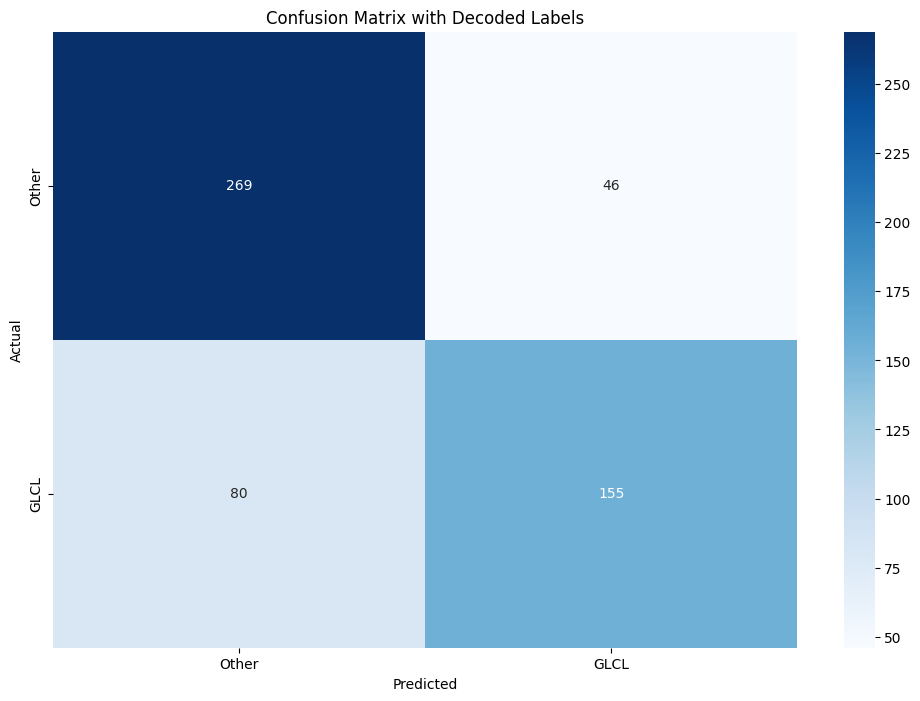

Model saved to RandomForest_model_Binary_Classification.pkl


In [72]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Decode the encoded labels back to the original labels
y_train_decoded = label_encoder.inverse_transform(y_train)
y_test_decoded = label_encoder.inverse_transform(y_test)

# Important class
important_class = "GLCL"

# Converting to binary labels
y_train_binary = pd.Series([1 if label == important_class else 0 for label in y_train_decoded])
y_test_binary = pd.Series([1 if label == important_class else 0 for label in y_test_decoded])

# Create a mapping for visualization
binary_to_original_mapping = {
    1: important_class,
    0: 'Other'
}

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train_binary)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test_binary, y_pred)
report = classification_report(y_test_binary, y_pred)
conf_matrix = confusion_matrix(y_test_binary, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

# Decode the labels using the dictionary
decoded_labels = [binary_to_original_mapping[key] for key in sorted(binary_to_original_mapping)]

# Plot the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=decoded_labels, yticklabels=decoded_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with Decoded Labels')
plt.show()

# Save the trained model to a file
model_filename = 'RandomForest_model_Binary_Classification.pkl'
joblib.dump(rf_classifier, model_filename)
print(f'Model saved to {model_filename}')


dict_items([(1, 'GLCL'), (0, 'Other')])
Processing index: 1, label: GLCL
Index is 1
Processing index: 0, label: Other
Index is 0


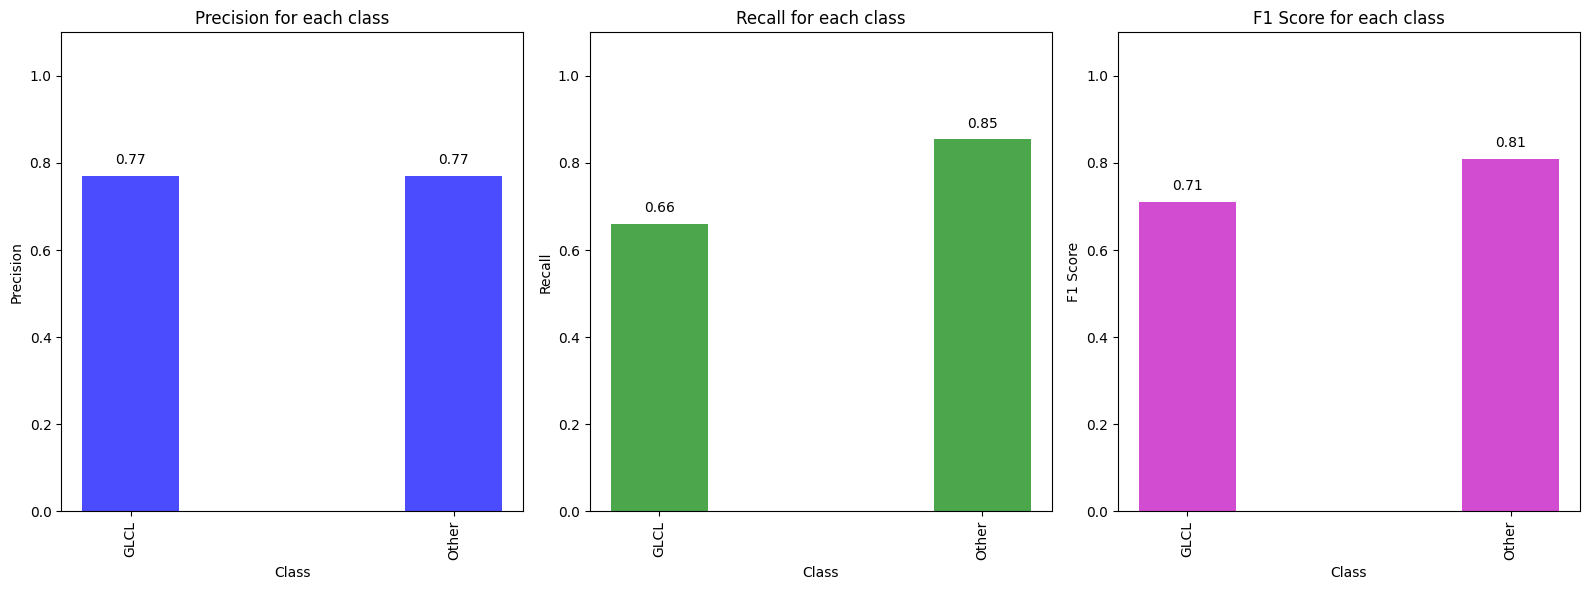

In [73]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists to store precision, recall, accuracy, and F1 score for each label
precisions = []
recalls = []
f1_scores = []

print(binary_to_original_mapping.items())

# Calculate precision, recall, accuracy, and F1 score for each label
for index, label in binary_to_original_mapping.items():  # Swap label and index
    print(f"Processing index: {index}, label: {label}")
    
    if index == 1:
        print("Index is 1")
        # True Positives (TP): Diagonal element for the current label
        tp = conf_matrix[1, 1]

        # False Positives (FP): Sum of the column for the current label excluding the diagonal element
        fp = conf_matrix[0, 1]

        # False Negatives (FN): Sum of the row for the current label excluding the diagonal element
        fn = conf_matrix[1, 0]

        # True Negatives (TN): Sum of all elements in the matrix excluding the current row and column
        tn = conf_matrix[0, 0]
    elif index == 0:
        print("Index is 0")
        # True Positives (TP): Diagonal element for the current label
        tp = conf_matrix[0, 0]

        # False Positives (FP): Sum of the column for the current label excluding the diagonal element
        fp = conf_matrix[1, 0]

        # False Negatives (FN): Sum of the row for the current label excluding the diagonal element
        fn = conf_matrix[0, 1]

        # True Negatives (TN): Sum of all elements in the matrix excluding the current row and column
        tn = conf_matrix[1, 1]
    else:
        assert False, f"Unexpected label value: {index}"  # Assert for unexpected values
        print("Index is neither 0 nor 1, skipping this index")
        continue  # Skip labels not covered in the binary mapping

    # Calculate Precision
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    precisions.append(precision)

    # Calculate Recall
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0
    recalls.append(recall)

    # Calculate F1 Score
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    f1_scores.append(f1_score)

# Plot Precision, Recall, and F1 Score for each label
labels = list(binary_to_original_mapping.values())
x = np.arange(len(labels))

bar_width = 0.3

plt.figure(figsize=(16, 6))

# Plot Precision
plt.subplot(1, 3, 1)
plt.bar(x, precisions, width=bar_width, color='b', alpha=0.7)
plt.xticks(x, labels, rotation=90)
plt.xlabel('Class')
plt.ylabel('Precision')
plt.title('Precision for each class')
plt.ylim(0, 1.1)
for i, v in enumerate(precisions):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom', color='black')

# Plot Recall
plt.subplot(1, 3, 2)
plt.bar(x, recalls, width=bar_width, color='g', alpha=0.7)
plt.xticks(x, labels, rotation=90)
plt.xlabel('Class')
plt.ylabel('Recall')
plt.title('Recall for each class')
plt.ylim(0, 1.1)
for i, v in enumerate(recalls):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom', color='black')

# Plot F1 Score
plt.subplot(1, 3, 3)
plt.bar(x, f1_scores, width=bar_width, color='m', alpha=0.7)
plt.xticks(x, labels, rotation=90)
plt.xlabel('Class')
plt.ylabel('F1 Score')
plt.title('F1 Score for each class')
plt.ylim(0, 1.1)
for i, v in enumerate(f1_scores):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()